ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object
[[-87.70950912  41.87812815]
 [-87.63118325  41.69665341]
 [-87.68494997  41.98181682]
 [-87.61951529  41.80356333]
 [-87.756896

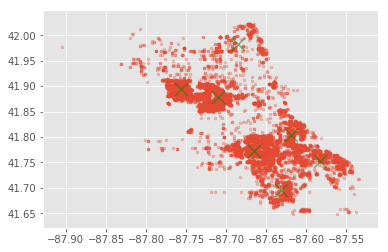

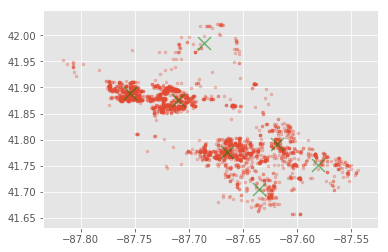

In [1]:
#
# TODO: Import whatever needs to be imported to make this work
#
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

# Look Pretty
matplotlib.style.use('ggplot')
plt.style.use('ggplot')


#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'



def doKMeans(df):
  #
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
  # and Latitude locations in your dataset. Longitude = x, Latitude = y
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

  #
  # TODO: Filter df so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
  #
  # .. your code here ..
  dfnew = df[["Longitude", "Latitude"]]
  #
  # TODO: Use K-Means to try and find seven cluster centers in this df.
  # Be sure to name your kmeans model `model` so that the printing works.
  #
  # .. your code here ..
  model = KMeans(n_clusters=7)
  model.fit(dfnew)
  #
  # INFO: Print and plot the centroids...
  centroids = model.cluster_centers_
  ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='green', alpha=0.5, linewidths=3, s=169)
  print(centroids)



#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
df = pd.read_csv("/Users/madushani/Google Drive/Python_practice/Crimes_2001_to_present.csv")

# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
df = df.dropna()
df = df.reset_index(drop=True)

#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
#print(df.dtypes)

#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
df.Date = pd.to_datetime(df.Date, errors='coerce')
print(df.dtypes)


# INFO: Print & Plot your data
doKMeans(df)


#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..
dfpart = df[df.Date > '2011-01-01']


# INFO: Print & Plot your data
doKMeans(dfpart)
plt.show()


    



In [2]:

df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,2006-02-09 22:29:07,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,2006-02-01 12:30:27,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,2006-02-02 19:02:12,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,2006-02-01 20:13:00,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,2006-02-01 10:10:00,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,2006-02-03 16:40:00,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,2006-02-03 16:30:00,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,2006-02-03 20:00:00,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,2006-02-02 19:30:00,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,2006-02-02 18:50:00,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"
